The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.


## Case study on Regression


In [1]:
# imorting necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('C:/Users/munee/OneDrive/Desktop/DSA/Assignments/car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [9]:
data.corr()# So the price and year are linearly correlated and we can go for the regression model

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


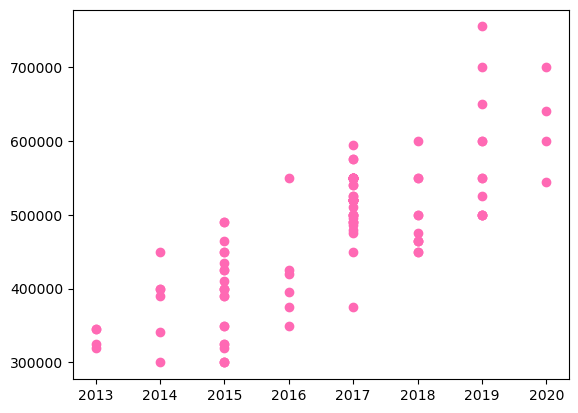

In [10]:
plt.scatter(data['Year'], data['Price'],color = 'hotpink')

## Find the best linear relationship between year and price.

Regression analysis is a predictive modeling technique.It predicts the relationship between the independnat variable and dependant variable

linear regression is used to predict the relationship between two variables or factors.It use sthe equation y=mx+b
Linear Regression model will find out the best fit line for the data points in the scatter cloud
**The line which has the least sum of squares of errors is the best fit line.


Coefficient of Determination R² → R-squared R-squared is one of the measures of goodness of the model. (best-fit line)

Coefficient of determination or R-squared measures how much variance in y is explained by the model.

The R-squared value ranges between 0 and 1

0 → being a bad model and 1 being good.

### linear regression 

In [11]:
y=data['Price']
x=data.drop(['Price'],axis=1)



In [12]:
# splitting faeatures into test and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x , y , test_size=0.2 , random_state = 42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model = lr.fit (x_train , y_train)

y_pred = model.predict(x_test)


In [13]:
from sklearn.metrics import mean_squared_error,r2_score

print('MSE is ', mean_squared_error(y_test,y_pred))
print('R Squared value :',r2_score(y_test,y_pred))

MSE is  4326906256.829671
R Squared value : 0.36759313425902185


## Can you predict the possible price of a 2022 model second-hand grand i10?

In [14]:
y_pred2022 = model.predict([[2022]])

C:\Users\munee\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
y_pred2022# This is the predicted price of a 2022 model second-hand grand i10 for the year 2022

array([743601.61594504])

### lasso Regression

In [16]:
from sklearn.model_selection import train_test_split

xtest,xtrain,ytest,ytrain = train_test_split(x,y,test_size=0.2,random_state=42)


In [17]:
from sklearn.linear_model import Lasso
lasso= Lasso ()

model1=lasso.fit(xtrain,ytrain)
y_pred1 = model1.predict(xtest)
    

In [18]:
print('MSE is ', mean_squared_error(ytest,y_pred1))
print('R Squared value :',r2_score(ytest,y_pred1))

MSE is  4003715449.640151
R Squared value : 0.5347708043455808


In [19]:
print("slope slope is: %.2f" % lasso.coef_[0])

slope slope is: 34793.56


In [20]:
print("intercept: %2.f"% lasso.intercept_)

intercept: -69700991


##  Find out which one is performing better.

 Model with least MSE and R2 value closer to 1

In [21]:
##The lasso regression model has a lesser MSE and R2 value closer to 1

## But since the difference is slight we cannot opt for one with high level of assurance